#Assignment 1

Using two datasets, we attempt to answer the question "can we measure and predict energy use based on observables that are easier to be acquired". In this case, we want to see if we can measure energy usage based on number of units in a building, as we are assuming they are all occupied.

We will use data on energy consumption disclosed by the former OLTPS (now NYC Sustainability)  because of Local Law 84, and Map Pluto data for Manhattan.

In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
from pandas.tools.plotting import scatter_matrix
#s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
%pylab inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [16]:
#Original data downloaded from Open Data, then saved on local machine
url = 'https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z'

In [17]:
#looking at dataset
nrg = gp.GeoDataFrame.from_csv('/Users/mariaortiz/PUI2015/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
print nrg.columns 

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


reading in the Pluto data for manhattan, which will give me the number of units ber building Manhattan/MNMapPLUTO.shp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107aec810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109bc8c10>]], dtype=object)

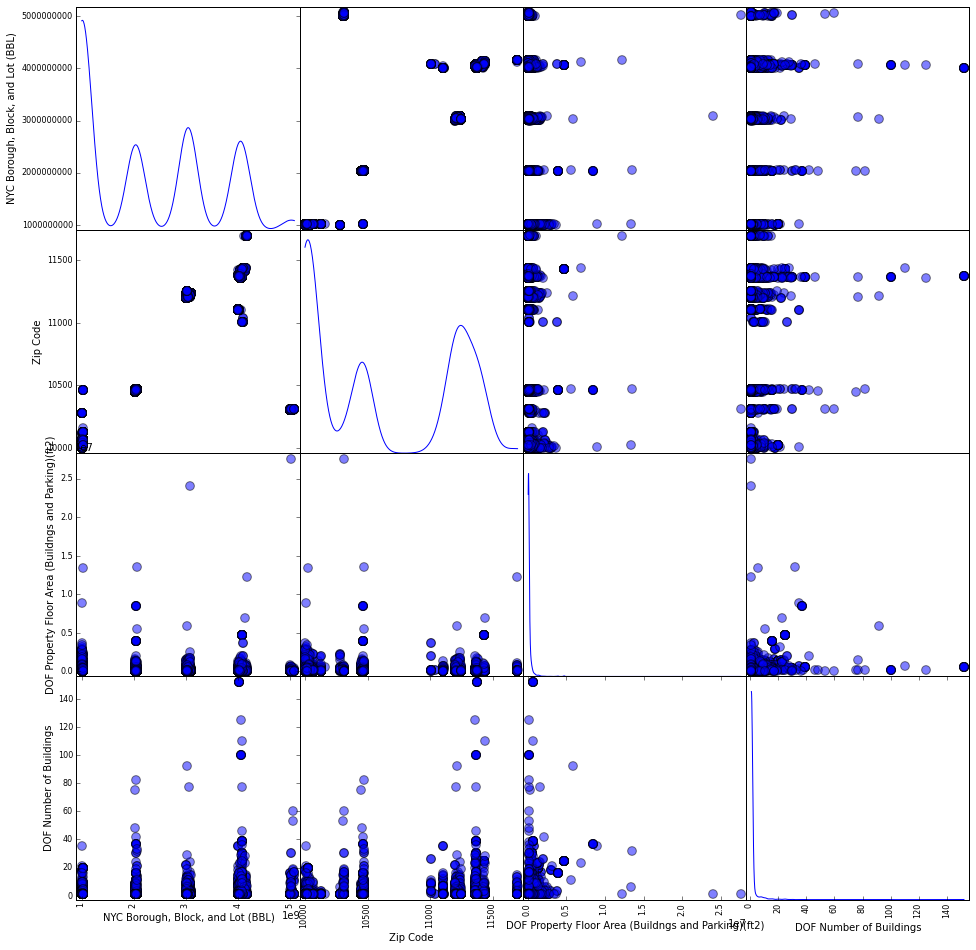

In [5]:
scatter_matrix (nrg, s = 300, figsize = (16, 16), diagonal = 'kde')

In [18]:
bsize = gp.GeoDataFrame.from_file('/Users/mariaortiz/PUI2015/Manhattan/MNMapPLUTO.shp')
print bsize.columns
#print bsize.head()


Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x143197290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ad4cd10>]], dtype=object)

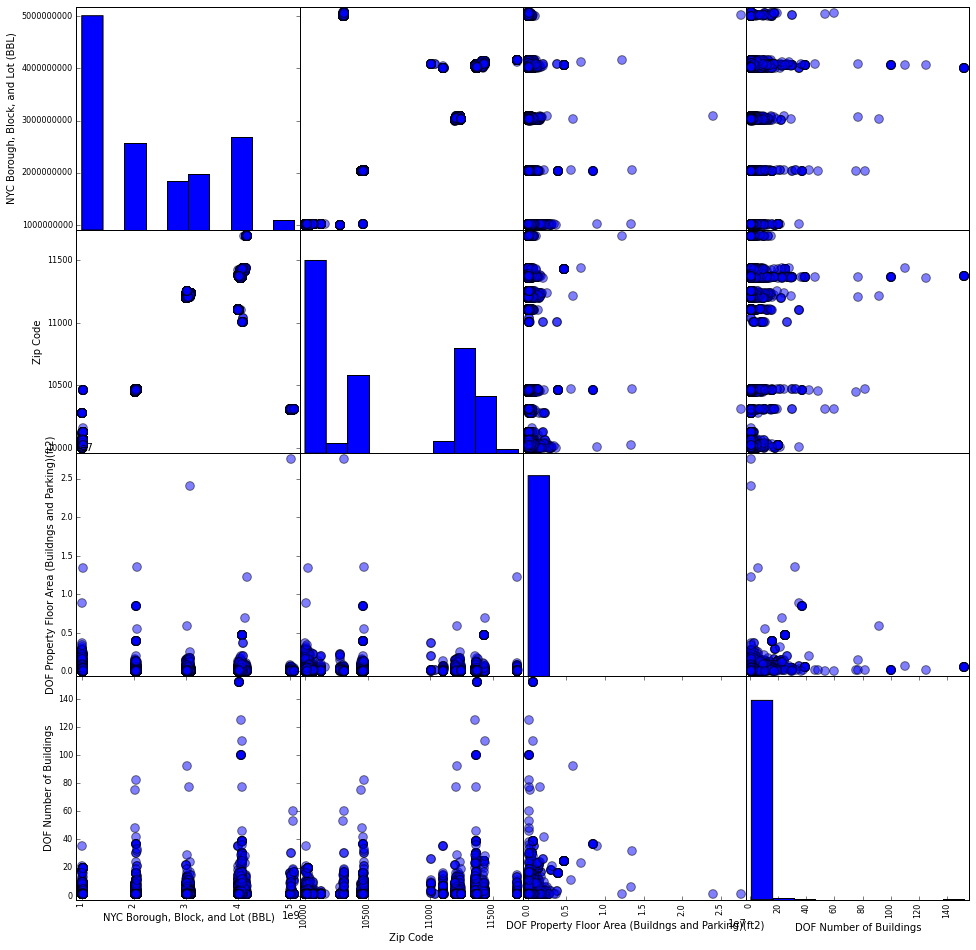

In [147]:
scatter_matrix (nrg, s = 300, figsize = (16, 16), diagonal = 'hist')

In [5]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

F Bianco:
Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx)

In [19]:
#create array here
#will be using - Site EUI and Property Floor Area
index = np.vectorize(canconvert)
indxEUI = index(nrg['Site EUI(kBtu/ft2)'])
indxAREA = index(nrg['Reported Property Floor Area (Building(s)) (ft²)'])
indxUNITS = index(bsize['UnitsRes'])
print indxEUI
print indxAREA
print indxUNITS

#nrg['Site EUI(kBtu/ft2)'] =nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
#nrg['Reported Property Floor Area (Building(s)) (ft²)'] =nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

[ True  True  True ...,  True  True  True]
[ True  True  True ...,  True  True  True]
[ True  True  True ...,  True  True  True]


In [20]:
#this is an example...
nrg['Site EUI(kBtu/ft2)'][~indxEUI]=float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indxAREA]=float('NaN')
bsize['UnitsRes'][~indxUNITS]=float('NaN')
##etc etc... for all columns you care about

/Users/mariaortiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/mariaortiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mariaortiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We need to check that your conversion worked: e.g.
print nrg['Site EUI(kBtu/ft2)'].astype(float)
and check all columns you care about in both datasets. 

*Nan's are ok, but you must not get an error when you try the conversion the Pluto data is much better at not using spurious entries for numerical value columns but check you can use the columns you want with print bsize.BBL.astype(float)
Notice I can use the attribute notation to refer to columns in bsize, because the column names do not have spaces!

In [151]:
##checking that conversion worked
#print nrg['Site EUI(kBtu/ft2)'].astype(float)
#print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print bsize['UnitsRes'].astype(float)
#print bsize.BBL.astype(float)


0           5
1           4
2           0
3           0
4           0
5           8
6          18
7           2
8           5
9           0
10          9
11          0
12          0
13          2
14          4
15          1
16          0
17          0
18          0
19          0
20          0
21          0
22         22
23          1
24          0
25          3
26          2
27          0
28          0
29          2
         ... 
42756       0
42757       0
42758       0
42759      40
42760     814
42761      28
42762       0
42763       0
42764       0
42765      80
42766     287
42767       6
42768       0
42769       0
42770       0
42771     140
42772       0
42773      89
42774       0
42775      14
42776       7
42777       0
42778      12
42779       0
42780    8018
42781    1003
42782      51
42783      49
42784      26
42785      53
Name: UnitsRes, dtype: float64


TO MERGE THE DATASET WE NEED A COMMON COLUMN

Here is where we will attempt to merge the datasets. We need a common column: the building id BBL. However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. 

First, create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html



In [21]:
#creating BBL column 
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'].astype(float)
#merging the data sets using the BBL
nrgwbbl = pd.merge(nrg, bsize, how = 'inner', on = 'BBL')

#print bblnrgdata
#print nrgwbbl.columns
#print nrgwbbl.head()
print (nrgwbbl.columns[0:100])

Index([                              u'NYC Borough, Block, and Lot (BBL)',
                                                u'Co-reported BBL Status',
                                                      u'BBLs Co-reported',
                   u'Reported NYC Building Identificaiton Numbers (BINs)',
                                                         u'Street Number',
                                                           u'Street Name',
                                                             u'Borough_x',
                                                              u'Zip Code',
                                    u'DOF Benchmarking Submission Status',
                                                    u'Site EUI(kBtu/ft2)',
                                 u'Weather Normalized Site EUI(kBtu/ft2)',
                                                  u'Source EUI(kBtu/ft2)',
                               u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supp

Once we have our dataframe 'nrgwbbl', we need to plot Energy vs Number of Units in the Building. 
*Remember: Energy TOTAL, not per sq ft

###I will be choosing residential units 'UnitsRes', because I work with these numbers at DSNY to measure service to NYC residents. 

*Now... make a 'natural' scale scatter plot first it will look really bad cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. perhaps zoom into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot; when the points in a plot all look scrunched against the axis try a log plot! in pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)
NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data i had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



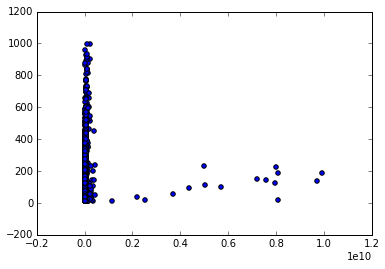

In [30]:
#plotting Total Energy vs Number of Units
#nrgwbbl.plot(kind='scatter', x='Site EUI(kBtu/ft2)', y='Reported Property Floor Area (Building(s)) (ft²)')
#nrgwbbl.plot(kind='scatter', x='Site EUI(kBtu/ft2)', y='UnitsRes')
#nrgwbbl.plot(x='Site EUI(kBtu/ft2)', y='Reported Property Floor Area (Building(s)) (ft²)')

# nrgwbbl['Energy Total'] = nrgwbbl['Site EUI(kBtu/ft2)'] * nrgwbbl['Units Total]
# totepu = pl.scatter(nrgwbbl['Energy Total'], nrgwbbl['Units Total'])
                                                                  
#old
nrgwbbl['Energy Total'] = nrgwbbl['Site EUI(kBtu/ft2)'].astype(float) * nrgwbbl['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
totepu = pl.scatter(nrgwbbl['Energy Total'], nrgwbbl['UnitsTotal'])#, 'ro', loglog = True )
#print nrgwbbl['Energy Total']

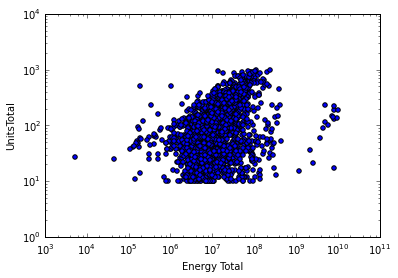

In [23]:
nrgwbbl = nrgwbbl[(nrgwbbl['Energy Total'] > 1000) & (nrgwbbl['Energy Total'] < 1e10) & (nrgwbbl['UnitsTotal'] >= 10) & (nrgwbbl['UnitsTotal'] < 1000)]
nrgwbbl.plot(kind='scatter', x='Energy Total', y='UnitsTotal', marker='o', loglog = True )

In [24]:
logx = np.log(nrgwbbl['Energy Total'])
logy = np.log(nrgwbbl['UnitsTotal'])

#totepu = pl.scatter(logx, logy)

##Now that looks much better!

####Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

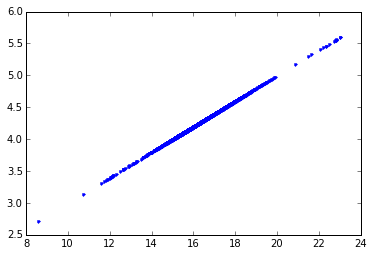

In [26]:
#here we will fit a line
#from class lab5
def line (xx, a, b):
    return a*(xx)+b
lineA = line(logx, 0.2, 1.0)
#lineA is our y variable!

pl.plot (logx, lineA, '.')

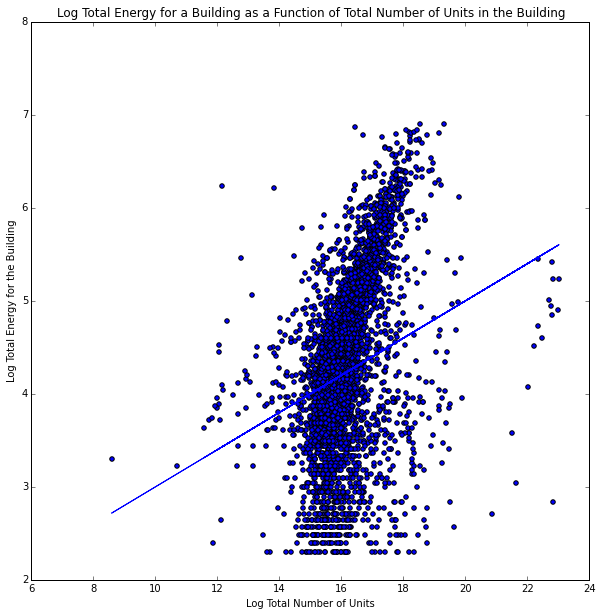

In [33]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(logx, logy, label = "plus some noise")
ax.plot(logx, lineA)

plt.xlabel('Log Total Number of Units')
plt.ylabel('Log Total Energy for the Building')
plt.title('Log Total Energy for a Building as a Function of Total Number of Units in the Building')

###Now fitting a line to a log of varibles

In [28]:
import statsmodels.api as sm
#fitting with log
X = sm.add_constant(np.log10(logx))
#print X
model = sm.OLS(np.log10(logy), X, missing='drop').fit() # ignores entires where x or y is NaN

print model.summary()
#return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     717.0
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          4.54e-146
Time:                        01:57:14   Log-Likelihood:                 4251.6
No. Observations:                4239   AIC:                            -8499.
Df Residuals:                    4237   BIC:                            -8487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.9972      0.061    -16.433   

In [41]:
datax = nrgwbbl['UnitsTotal']
datay = nrgwbbl['Site EUI(kBtu/ft2)'].astype(float) * nrgwbbl['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

X = sm.add_constant(np.log10(datax[index]))
#Y = np.log10(datay[index])
#mod = sm.OLS(Y, X, missing = 'drop').fit()
#print mod.summary()

KeyError: <numpy.lib.function_base.vectorize object at 0x132497650>

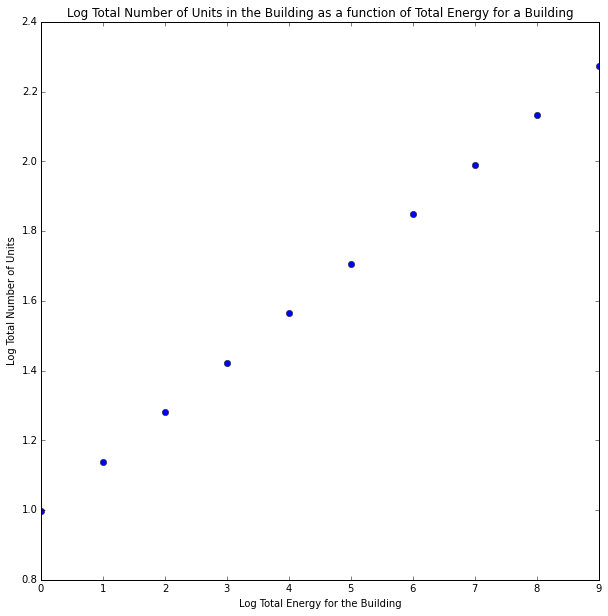

In [43]:
fig = figure(figsize = (10,10))
ax = fig.add_subplot(111)
XLR = np.arange(0, 10, 1)
YLR = 0.1418*XLR + 0.9972
ax.plot(XLR, YLR, 'ob')
plt.ylabel('Log Total Number of Units')
plt.xlabel('Log Total Energy for the Building')
plt.title('Log Total Number of Units in the Building as a function of Total Energy for a Building')

###Fit Summary: Whic is better? Should we do a likelihood ratio test yes or no?

In [ ]:
#fit summary
print mod.summary()
#anwer question


###Now fitting a second degree curve

In [ ]:
x = 
y =
yl= 
np.polyfit(x,y,2)
deg2 = sm.OLS(yl, x).fit()
print deg.summary()


###Fit Summary: again, which is better, likelihood ratio test? Why or why not?

In [ ]:
#comments